In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from statsmodels import api as sm
from statsmodels.graphics.api import qqplot

#Download Loan data from https://www.lendingclub.com/info/download-data.action , years 2012-2013

df = pd.read_csv('LoanStats3b.csv', header=1, low_memory=False)

# converts string to datetime object in pandas:
df['issue_d_format'] = pd.to_datetime(df['issue_d']) 
dfts = df.set_index('issue_d_format') 
year_month_summary = dfts.groupby(lambda x : x.year * 100 + x.month).count()
loan_count_summary = year_month_summary['issue_d']

# Different way to convert to datetime and group
# df['issue_d_format'] = pd.to_datetime(df['issue_d'])
# df['issue_month'] = df['issue_d_format'].map(lambda val: val.month)
# df['issue_year'] = df['issue_d_format'].map(lambda val: val.year)

# loan_count_summary = df[["issue_year", "issue_month", "issue_d"]].groupby(["issue_year", "issue_month"]).count().rename(columns={"issue_d": "count"})



In [5]:
loan_count_summary

201201     2602
201202     2560
201203     2914
201204     3230
201205     3400
201206     3817
201207     4627
201208     5419
201209     6087
201210     6263
201211     6382
201212     6066
201301     6872
201302     7561
201303     8273
201304     9419
201305    10350
201306    10899
201307    11910
201308    12674
201309    12987
201310    14115
201311    14676
201312    15020
Name: issue_d, dtype: int64

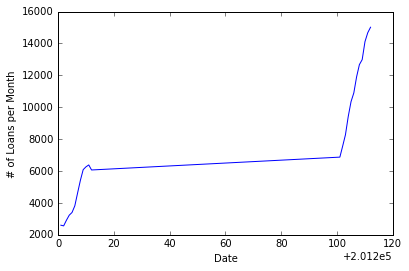

In [6]:
plt.plot(loan_count_summary)
plt.xlabel('Date')
plt.ylabel('# of Loans per Month')

In [17]:
# stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()
# Difference the coorelation
loan_count_summary_diff = loan_count_summary - loan_count_summary.shift()
loan_count_summary_diff.drop(201201, inplace=True)
loan_count_summary_diff

201202     -42
201203     354
201204     316
201205     170
201206     417
201207     810
201208     792
201209     668
201210     176
201211     119
201212    -316
201301     806
201302     689
201303     712
201304    1146
201305     931
201306     549
201307    1011
201308     764
201309     313
201310    1128
201311     561
201312     344
Name: issue_d, dtype: float64

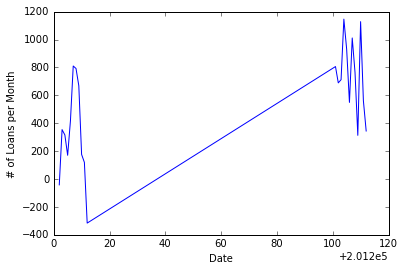

In [22]:
plt.plot(loan_count_summary_diff)
plt.xlabel('Date')
plt.ylabel('# of Loans per Month')

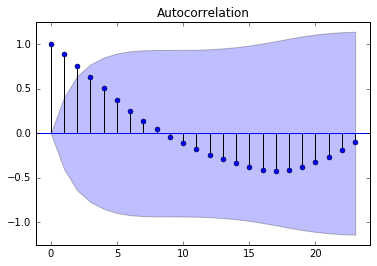

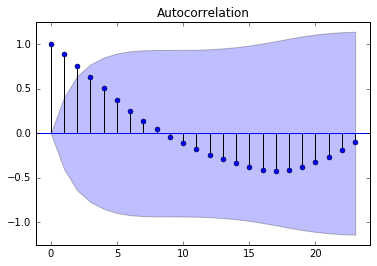

In [20]:
sm.graphics.tsa.plot_acf(loan_count_summary)

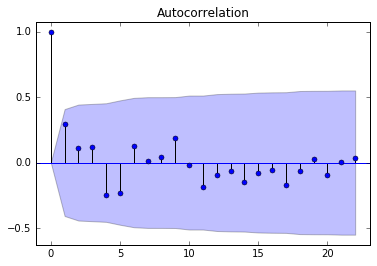

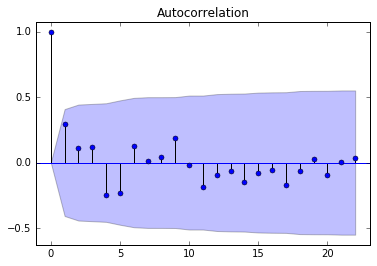

In [19]:
sm.graphics.tsa.plot_acf(loan_count_summary_diff)

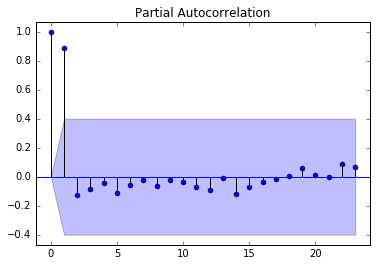

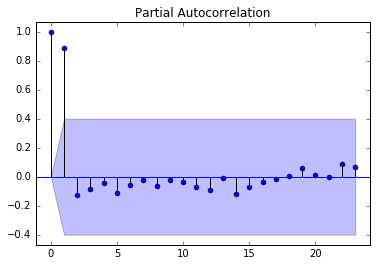

In [38]:
sm.graphics.tsa.plot_pacf(loan_count_summary)

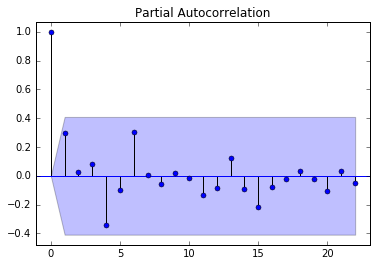

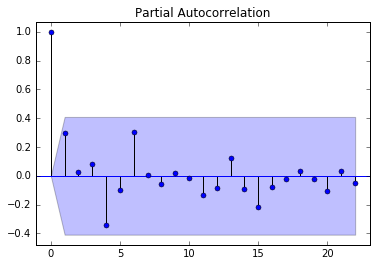

In [21]:
sm.graphics.tsa.plot_pacf(loan_count_summary_diff)